In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [219]:

# Load winequality-red dataset
wine_d = pd.read_csv('winequality-red.csv')
print(wine_d.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [220]:
# Data Preprocessing
# Feature selection and target
cols = ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality']
target = 'volatile acidity'
X = wine_d[cols].values
y = wine_d[target].values

In [221]:

X = np.c_[np.ones(X.shape[0]), X]
# Divide dataset into training and test sets (80%-training, 20%-testing)
training_size = int(0.8 * len(wine_d))
X_train, X_test = X[:training_size], X[training_size:]
y_train, y_test = y[:training_size], y[training_size:]

In [222]:
# Print shapes
print("Shapes - X_train:", X_train.shape, "y_train:", y_train.shape, "X_test:", X_test.shape, "y_test:", y_test.shape)


Shapes - X_train: (1279, 12) y_train: (1279,) X_test: (320, 12) y_test: (320,)


In [223]:
# Closed-form solution for linear regression
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
w

array([-2.56896658e+01,  7.57155745e-03, -6.24500691e-01, -7.01450472e-03,
        6.55443011e-01, -2.71531993e-03,  1.09757469e-03,  2.63947856e+01,
       -1.81349404e-02, -1.40925049e-01,  3.42109063e-02, -4.28081064e-02])

In [224]:
# Predictions
predictions = X_test @ w

# Calculate Mean Squared Error (MSE)
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.01806488689762239


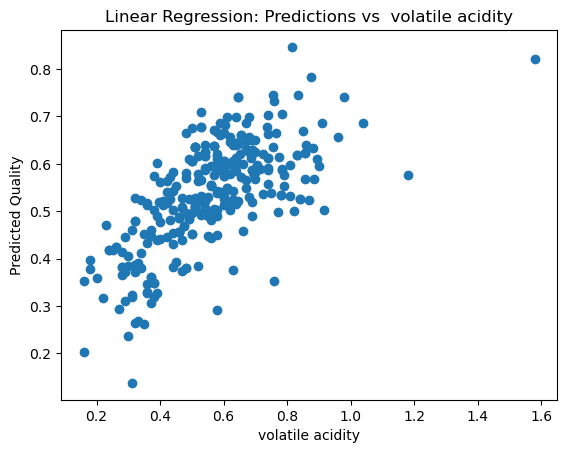

In [225]:
# Plot predictions vs actual data
plt.scatter(y_test, predictions)
plt.xlabel("volatile acidity")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression: Predictions vs  volatile acidity")
plt.show()

In [226]:
# Load dataset
penguins_dataset = pd.read_csv('penguins.csv')
penguins_dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [227]:
penguins_dataset = pd.read_csv('penguins.csv')
penguins_dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [228]:
#droping the missing values
penguins_dataset.dropna(inplace = True)
def label_encode(column):
    unique = column.unique()
    category_to_num = {category: i for i, category in enumerate(unique)}
    encoded_col = column.map(category_to_num)
    return encoded_col

# Apply label encoding to the 'species', 'island', and 'sex' columns
penguins_dataset['species'] = label_encode(penguins_dataset['species'])
penguins_dataset['island'] = label_encode(penguins_dataset['island'])
penguins_dataset['sex'] = label_encode(penguins_dataset['sex'])

print(penguins_dataset['species'].value_counts())
print(penguins_dataset['island'].value_counts())
# Normalize non-categorical features
numeric_cols = ['species','island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numeric_cols:
    mean_value = penguins_dataset[feature].mean()
    std_deviation = penguins_dataset[feature].std()
    penguins_dataset[feature] = (penguins_dataset[feature] - mean_value) / std_deviation

penguins_dataset.head()

0    146
1    119
2     68
Name: species, dtype: int64
1    163
2    123
0     47
Name: island, dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,-0.997325,-1.811311,-0.894695,0.779559,-1.424608,-0.567621,0,2007
1,-0.997325,-1.811311,-0.821552,0.119404,-1.067867,-0.505525,1,2007
2,-0.997325,-1.811311,-0.675264,0.424091,-0.425733,-1.188572,1,2007
4,-0.997325,-1.811311,-1.333559,1.084246,-0.568429,-0.940192,1,2007
5,-0.997325,-1.811311,-0.858123,1.744400,-0.782474,-0.691811,0,2007


In [229]:
# Create data matrices for X (input) and y (target)
cols = ['species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'sex'
X = penguins_dataset[cols]
y = penguins_dataset[target]

In [230]:
print(X)
print(y)

      species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0   -0.997325       -0.894695       0.779559          -1.424608    -0.567621
1   -0.997325       -0.821552       0.119404          -1.067867    -0.505525
2   -0.997325       -0.675264       0.424091          -0.425733    -1.188572
4   -0.997325       -1.333559       1.084246          -0.568429    -0.940192
5   -0.997325       -0.858123       1.744400          -0.782474    -0.691811
..        ...             ...            ...                ...          ...
339  1.607453        2.159064       1.338151           0.430446    -0.257145
340  1.607453       -0.090112       0.474872           0.073705    -1.002287
341  1.607453        1.025333       0.525653          -0.568429    -0.536573
342  1.607453        1.244765       0.931902           0.644491    -0.132954
343  1.607453        1.135049       0.779559          -0.211688    -0.536573

[333 rows x 5 columns]
0      0
1      1
2      1
4      1
5      0
      .

In [231]:
# Divide dataset into training and test sets (80%-training, 20%-testing)
training_size = int(0.8 * len(penguins_dataset))
X_train, X_test = X[:training_size], X[training_size:]
y_train, y_test = y[:training_size], y[training_size:]
# Print shapes
print("Shapes - X_train:", X_train.shape, "y_train:", y_train.shape, "X_test:", X_test.shape, "y_test:", y_test.shape)

Shapes - X_train: (266, 5) y_train: (266,) X_test: (67, 5) y_test: (67,)


In [261]:
class LogisticRegression:
    def __init__(self, l_rate=1e-6, iterations=10000):
        self.l_rate = l_rate
        self.iterations = iterations
        self.loss = []

    def sigmoid(self, l_prediction):
        return 1 / (1 + np.exp(-l_prediction))

    def add_intercept(self, X):
        inter = np.ones((X.shape[0], 1))
        return np.concatenate((inter, X), axis=1)

    def fit(self, X, y):
        X = self.add_intercept(X)
        self.t = np.zeros(X.shape[1])

        for i in range(self.iterations):
            l_prediction = np.dot(X, self.t)
            y_prediction = self.sigmoid(l_prediction)
            gradient = np.dot(X.T, (y_prediction - y)) / y.size
            self.t -= self.l_rate * gradient
            # Calculate the loss
            loss = (-y * np.log(y_prediction) - (1 - y) * np.log(1 - y_prediction)).mean()
            self.loss.append(loss)
    def predict(self, X):
        print(self.t)
        X = self.add_intercept(X)
        predictions = self.sigmoid(np.dot(X, self.t))
        return np.round(predictions)

In [264]:
# Train the model
m = LogisticRegression()
m.fit(X_train, y_train)

In [265]:
# Make predictions on test dataset
predictions = m.predict(X_test)

[-3.77800936e-05  1.54579298e-05 -1.60891167e-03 -1.78309819e-03
 -1.22908769e-03 -2.34050471e-03]


In [235]:
# Calculate accuracy
accur = np.mean(predictions == y_test)
print("Accuracy:", accur)

Accuracy: 0.8656716417910447


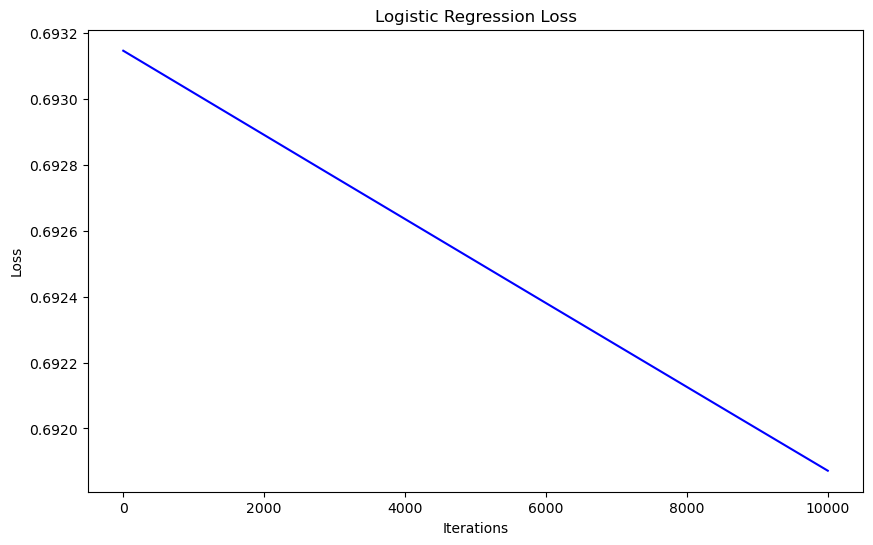

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(m.loss)), m.loss, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss')
plt.show()

Second Hyperparameter Tuning

In [266]:

m = LogisticRegression(l_rate=0.01, iterations=50000)
m.fit(X_train, y_train)

In [267]:
# Make predictions on test dataset
predictions = m.predict(X_test)


[ 0.40451191  3.17418299 -2.78007255 -3.69372925  0.56958212 -4.44725614]


In [256]:
# Calculate accuracy
accur = np.mean(predictions == y_test)
print("Accuracy:", accur)

Accuracy: 0.7910447761194029


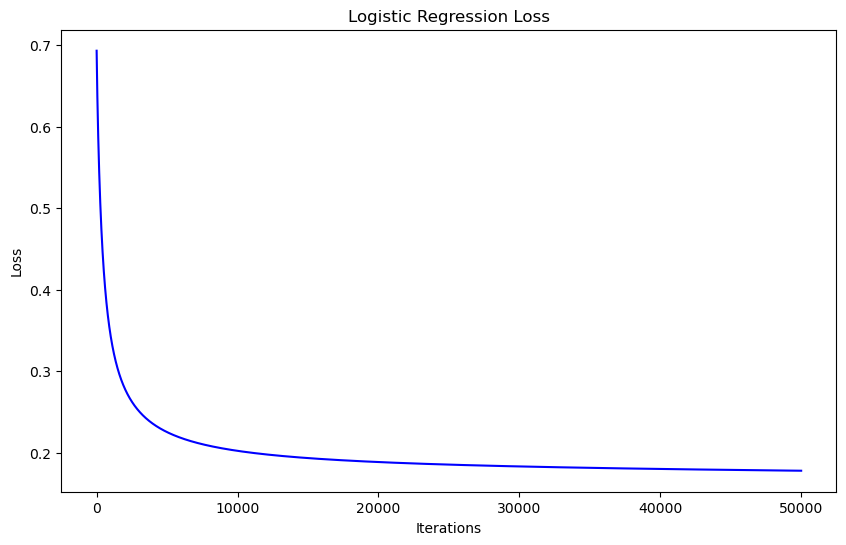

In [257]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(m.loss)), m.loss, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss')
plt.show()

Third Hyperparameter Tuning

In [268]:
m = LogisticRegression(l_rate=1e-2, iterations=10000)
m.fit(X_train, y_train)

In [269]:
# Make predictions on test dataset
predictions = m.predict(X_test)


[-0.11083769  1.33205726 -1.69088718 -3.14345308  0.00593171 -2.8419208 ]


In [270]:
# Calculate accuracy
accur = np.mean(predictions == y_test)
print("Accuracy:", accur)

Accuracy: 0.8955223880597015


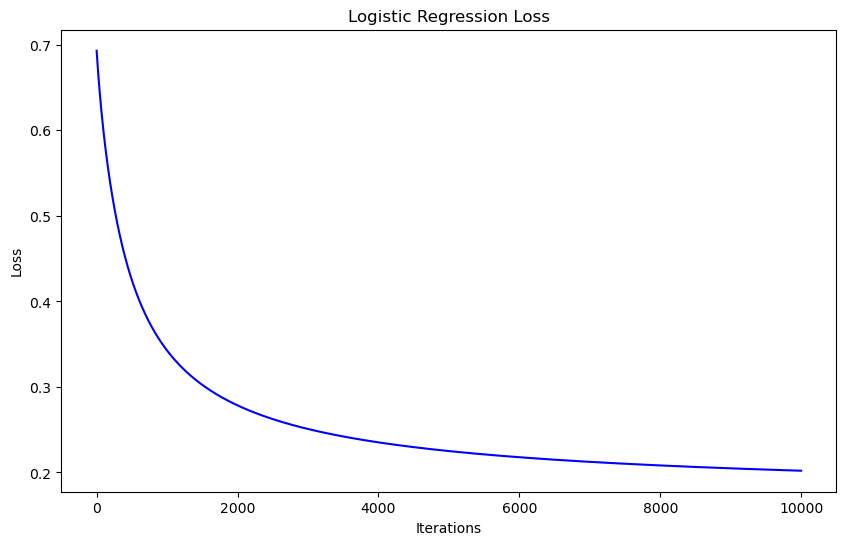

In [244]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(m.loss)), m.loss, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression Loss')
plt.show()